In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
    # Your code starts here
        csv_reader = csv.reader(training_file, delimiter=',')
        labels = []
        line_count = 0
        for row in csv_reader:
            if line_count!=0:
                label = row[0]
                img = np.asarray(row[1:], dtype=float).reshape((1,28,28))

                labels.append(label)
                if line_count==1:
                    images=img
                else:
                    images = np.vstack([images,img])
                
            line_count+=1
        # Your code ends here
    labels = np.asarray(labels, dtype=int)
    return images, labels


training_images, training_labels = get_data('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims, https://stackoverflow.com/questions/64165272/keras-custom-data-generator-from-numpy-array

training_images = np.expand_dims(training_images,-1)# Your Code Here
testing_images = np.expand_dims(testing_images,-1)# Your Code Here


In [ ]:
import matplotlib.pyplot as plt

6


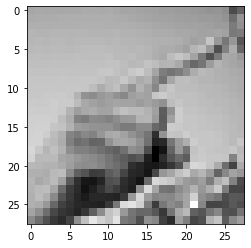

In [ ]:
print(training_labels[1])
plt.imshow(training_images[1], cmap='gray')
plt.show()

5


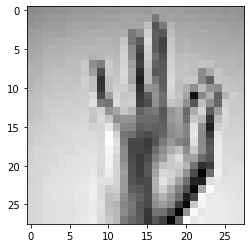

In [ ]:
print(testing_labels[1])
plt.imshow(testing_images[1], cmap='gray')
plt.show()

In [ ]:

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')
#    )

train_generator = train_datagen.flow(training_images,
                                     training_labels,
                                     batch_size = 32
                                     )
                  
validation_datagen = ImageDataGenerator(
  rescale=1./255)    
    # Your Code Here)

validation_generator = validation_datagen.flow(testing_images,
                                     testing_labels,
                                     batch_size = 16
                                     )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
# https://stackoverflow.com/questions/63171001/sparse-categorical-entropy-loss-becomes-nan-without-label-encoding will get nan loss
model = tf.keras.models.Sequential([
    # Your Code Here
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='softmax')
    ])

print(model.summary())
# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Your Code Here)

# Train the Model
history = model.fit(train_generator, epochs=50, validation_data = validation_generator, verbose = 1) # Your Code Here)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3277824   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2

[6.92426086682151, 0.56609035]

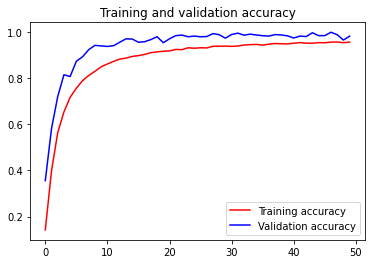

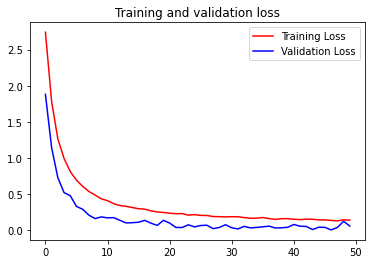

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()